In [3]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

In [4]:
# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

In [5]:
batch_size = 256

workers = 10

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5,], [0.5,])])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=workers)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=workers)


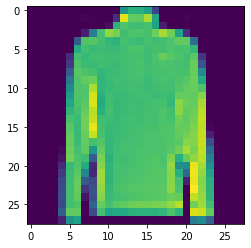

In [6]:
image, label = next(iter(trainloader))

def showImage(img):
    plt.imshow(img.view(28, 28))
showImage(image[0])


In [7]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 512)
        self.layer2 = nn.Linear(512, 512)
        # self.layer3 = nn.Linear(512, 512)
        # self.layer4 = nn.Linear(512, 512)
        self.layer5 = nn.Linear(512, 10)
        
        self.dropout = nn.Dropout(p=0.0)
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.dropout(F.relu(self.layer1(x)))
        x = self.dropout(F.relu(self.layer2(x)))
        # x = self.dropout(F.relu(self.layer3(x)))
        # x = self.dropout(F.relu(self.layer4(x)))
        x = F.log_softmax(self.layer5(x), dim=1)
        
        return x

In [8]:
model = Classifier()
model.to(device)
model

Classifier(
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=512, bias=True)
  (layer5): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
)

In [9]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

image, label = next(iter(trainloader))
image = image.to(device)
label = label.to(device)
image = image.view(image.shape[0], -1)

optimizer.zero_grad()

out = model.forward(image)
criterion(out, label)



tensor(2.3166, grad_fn=<NllLossBackward>)

In [10]:
epochs = 5

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

for e in range(epochs):
    running_loss = 0
    test_loss = 0
    test_acc = 0
    model.train()
    for images, labels in trainloader:
        images = images.to(device)
        labels = labels.to(device)
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        
        out = model.forward(images)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        model.eval()
        with torch.no_grad():
            for images, labels in testloader:
                images = images.to(device)
                labels = labels.to(device)
                out = model.forward(images)
                loss = criterion(out, labels)

                modellabel = torch.argmax(out, dim=1)

                test_loss += loss.item()
                test_acc += float(torch.sum(torch.eq(labels, modellabel))) / float(batch_size)

            print(f"epoch: {e}")
            print(f"test loss: {test_loss/len(testloader)}")
            print(f"test acc: {test_acc/len(testloader)}")
            print(f"training loss: {running_loss/len(trainloader)}")

epoch: 0
test loss: 0.4388027511537075
test acc: 0.82080078125
training loss: 0.5160974109426458
epoch: 1
test loss: 0.3932914849370718
test acc: 0.83603515625
training loss: 0.3724138065221462
epoch: 2
test loss: 0.37319842353463173
test acc: 0.84521484375
training loss: 0.3374963475668684
epoch: 3
test loss: 0.3372014336287975
test acc: 0.8564453125
training loss: 0.3065779481162416
epoch: 4
test loss: 0.3453603141009808
test acc: 0.8537109375
training loss: 0.2878173738718033


In [ ]:
model = Classifier2()
model.to(device)
model

In [ ]:
print(len(testloader))